les importation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score
import numpy as np
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading dataset

In [ ]:

dataset = pd.read_csv("/content/drive/My Drive/ML/creditcard.csv")
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


verification des valeurs manquantes

In [ ]:
valeurs_manquantes = dataset.isnull().sum().sum()
print("Il y a ",valeurs_manquantes," values manquantes ")


Il y a  0  values manquantes 


verification des valeurs dupliquées (sans supression)

In [ ]:
duplicates = dataset[dataset.duplicated()]
print("le nombre des lignes dupliquées:", duplicates.shape[0])


le nombre des lignes dupliquées: 1081


la distribution de 'class'

<ipython-input-8-90e11cf9ee8a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=dataset, palette='pastel', ax=axes[0])


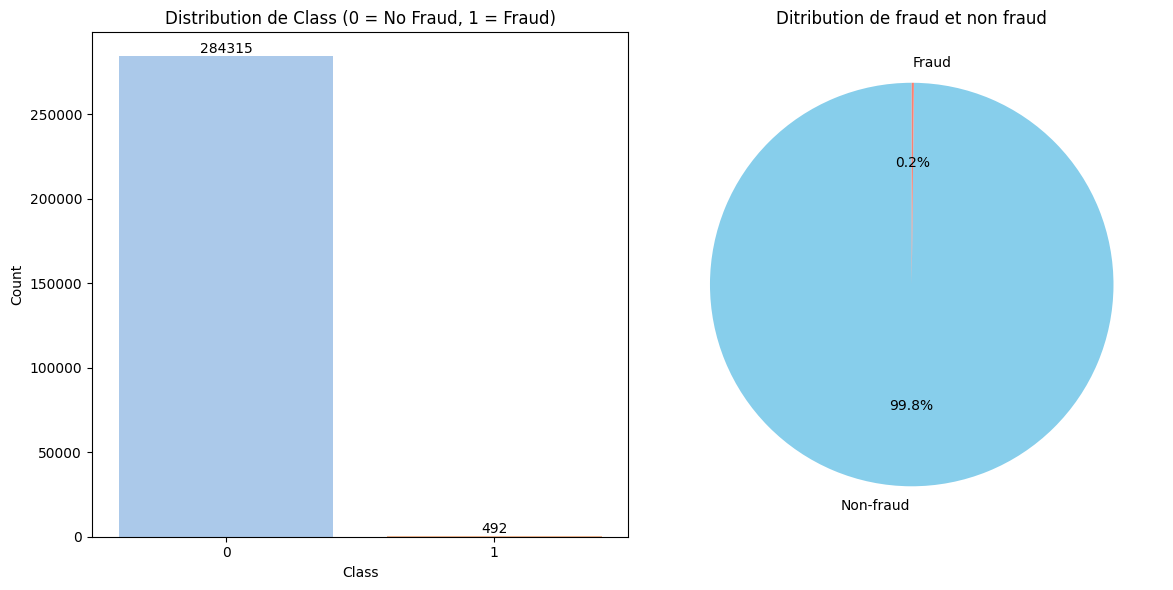

In [ ]:
class_counts = pd.Series(dataset['Class']).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='Class', data=dataset, palette='pastel', ax=axes[0])

class_counts = dataset['Class'].value_counts()
for i, count in enumerate(class_counts):
    axes[0].text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

axes[0].set_title('Distribution de Class (0 = No Fraud, 1 = Fraud)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

labels = ['Non-fraud', 'Fraud']
axes[1].pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[1].set_title('Ditribution de fraud et non fraud')

plt.tight_layout()
plt.show()



In [ ]:
fedi=dataset
iheb=dataset
emir=dataset


division du dataset fedi en 60% train,20% validation and 20% test puis oversampling par SMOTE et affichage

In [ ]:
X = fedi.drop(['Class'], axis=1)
y = fedi['Class']


X_train_valiation_fedi, X_test_fedi, y_train_valiation_fedi, y_test_fedi = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_fedi, y_train_fedi = smote.fit_resample(X_train_valiation_fedi, y_train_valiation_fedi)



print("Class distribution after SMOTE (training):\n", y_train_fedi.value_counts())
print("Class distribution (testing):\n", y_test_fedi.value_counts())

Class distribution after SMOTE (training):
 Class
0    227451
1    227451
Name: count, dtype: int64
Class distribution (testing):
 Class
0    56864
1       98
Name: count, dtype: int64


comparaison de la distribution de class avant et apres oversampling de fedi

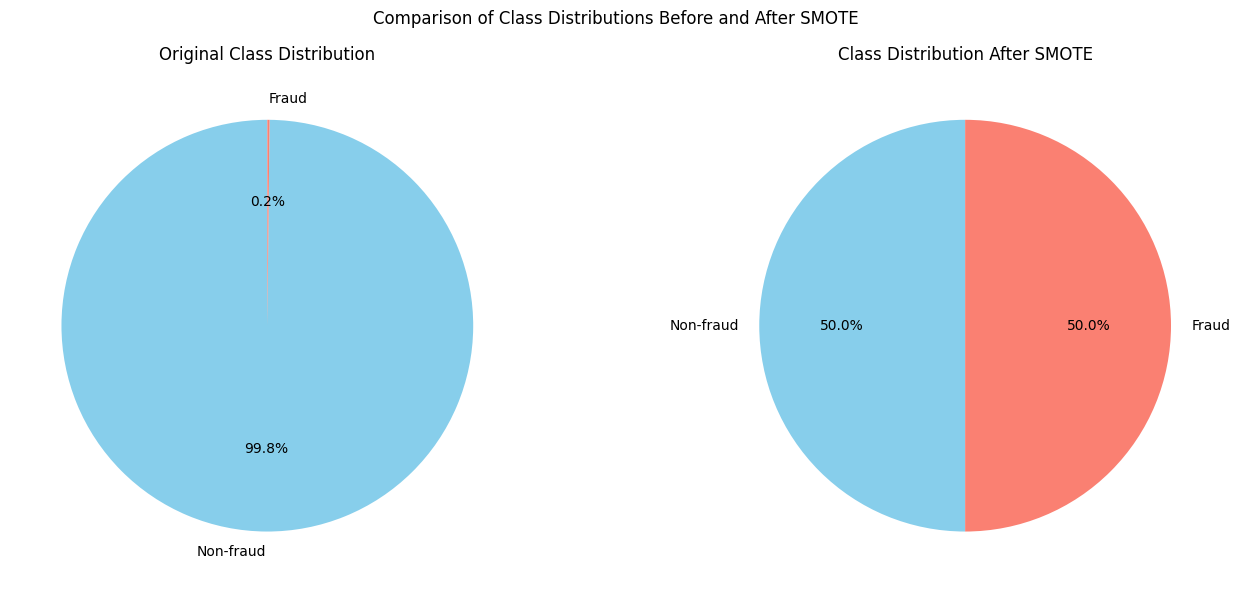

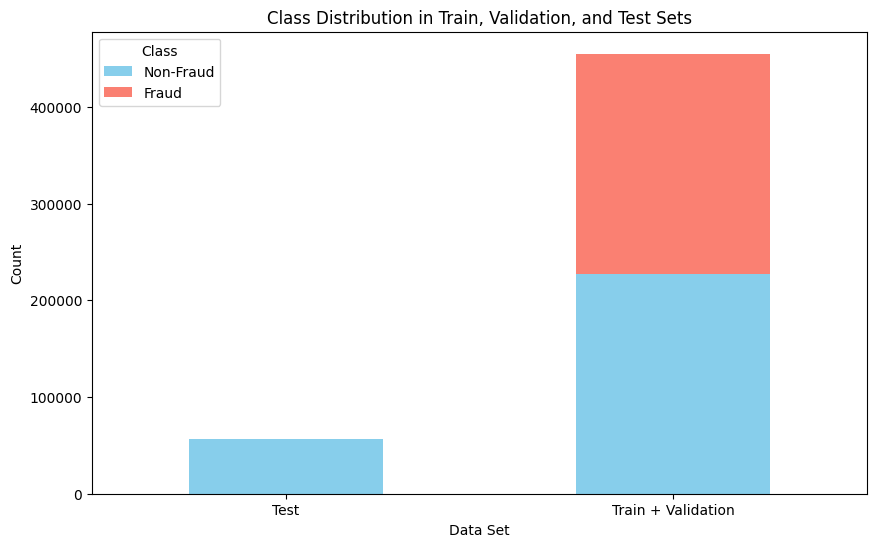

In [ ]:
class_counts_original = y.value_counts()


class_counts_balanced = pd.Series(y_train_fedi).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].pie(class_counts_original, labels=['Non-fraud', 'Fraud'],
            autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[0].set_title('Original Class Distribution')


axes[1].pie(class_counts_balanced, labels=['Non-fraud', 'Fraud'],
            autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[1].set_title('Class Distribution After SMOTE')


plt.suptitle('Comparison of Class Distributions Before and After SMOTE')
plt.tight_layout()
plt.show()

train_df = pd.DataFrame({'Set': 'Train + Validation', 'Class': y_train_fedi})
test_df = pd.DataFrame({'Set': 'Test', 'Class': y_test_fedi})

all_data = pd.concat([train_df,test_df])

plt.figure(figsize=(10, 6))
all_data.groupby(['Set', 'Class']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'salmon'])

plt.title("Class Distribution in Train, Validation, and Test Sets")
plt.xlabel("Data Set")
plt.ylabel("Count")
plt.legend(["Non-Fraud", "Fraud"], title="Class")
plt.xticks(rotation=0)
plt.show()

division du dataset iheb en 80% train et validation et 20% test en suite undersampling par la RandomUnderSampler puis overSampling par SMOTE en utilisant un pipeline puis division du train et validation en 60% train et 20% validation

In [ ]:
oversample = SMOTE(sampling_strategy=0.7, random_state=42)
undersample = NearMiss(sampling_strategy=0.004,version=1)


x_iheb=iheb.drop(columns=['Class'])
y_iheb=iheb['Class']
x_res_1,y_res_1=undersample.fit_resample(x_iheb, y_iheb)
X_train_iheb, X_test_iheb, y_train_iheb, y_test_iheb = train_test_split(x_res_1, y_res_1, test_size=0.2, random_state=42,stratify=y_res_1)

X_train_iheb, y_train_iheb = oversample.fit_resample(X_train_iheb,y_train_iheb)

print("Class distribution after resampling (training):\n", y_train_iheb.value_counts())
print("Class distribution after resampling (testing):\n", y_test_iheb.value_counts())

Class distribution after resampling (training):
 Class
0    98399
1    68879
Name: count, dtype: int64
Class distribution after resampling (testing):
 Class
0    24601
1       98
Name: count, dtype: int64


comparaison de la distribution de class avant et apres resampling de iheb

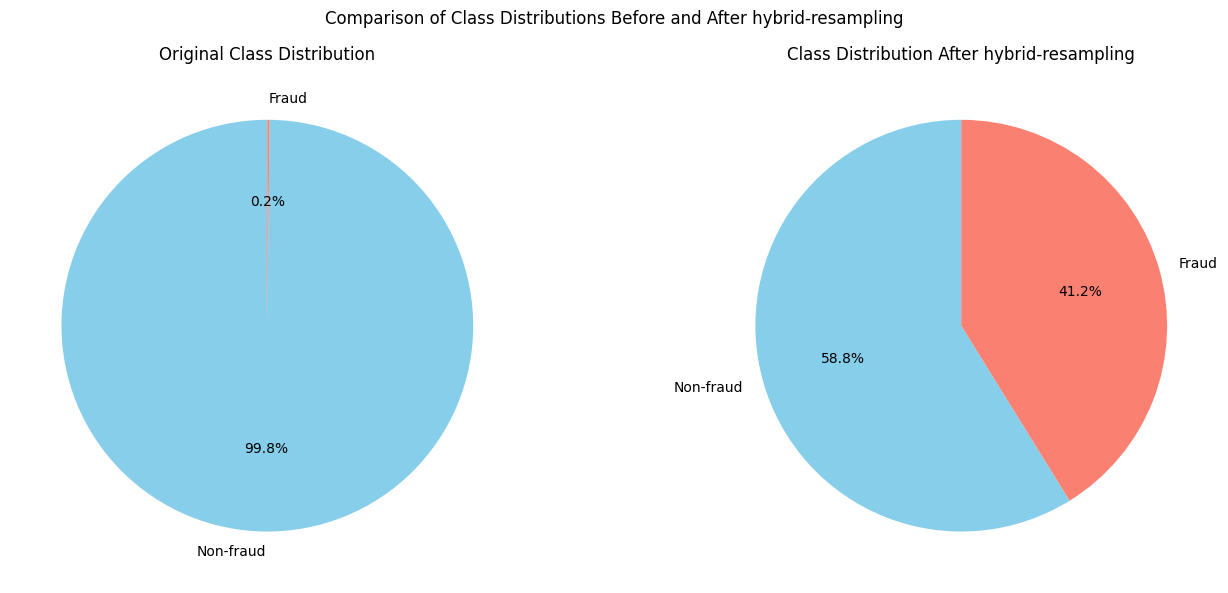

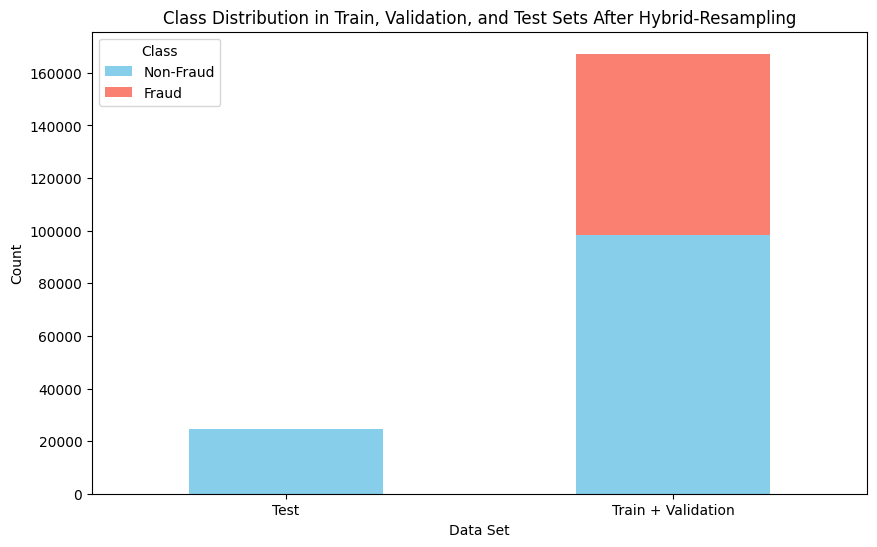

In [ ]:
class_counts_original = iheb['Class'].value_counts()


class_counts_balanced = pd.Series(y_train_iheb).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].pie(class_counts_original, labels=['Non-fraud', 'Fraud'],
            autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[0].set_title('Original Class Distribution')


axes[1].pie(class_counts_balanced, labels=['Non-fraud', 'Fraud'],
            autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[1].set_title('Class Distribution After hybrid-resampling')


plt.suptitle('Comparison of Class Distributions Before and After hybrid-resampling')
plt.tight_layout()
plt.show()

train_df = pd.DataFrame({'Set': 'Train + Validation', 'Class': y_train_iheb})
test_df = pd.DataFrame({'Set': 'Test', 'Class': y_test_iheb})

all_data = pd.concat([train_df, test_df])

plt.figure(figsize=(10, 6))
all_data.groupby(['Set', 'Class']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'salmon'])

plt.title("Class Distribution in Train, Validation, and Test Sets After Hybrid-Resampling")
plt.xlabel("Data Set")
plt.ylabel("Count")
plt.legend(["Non-Fraud", "Fraud"], title="Class")
plt.xticks(rotation=0)
plt.show()

undersampling par Nearmiss puis division du dataset emir en 60% train,20% validation and 20% test et affichage

In [ ]:
nm1 = NearMiss(sampling_strategy=1,version=1)
x_emir = emir.drop('Class', axis=1)
y_emir = emir['Class']
x_resampled, y_resampled = nm1.fit_resample(x_emir,y_emir)
X_train_emir, X_test_emir, y_train_emir, y_test_emir = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=5)
print("Class distribution after resampling (training):\n", y_train_emir.value_counts())
print("Class distribution after resampling (testing):\n", y_test_emir.value_counts())

Class distribution after resampling (training):
 Class
0    400
1    387
Name: count, dtype: int64
Class distribution after resampling (testing):
 Class
1    105
0     92
Name: count, dtype: int64


comparaison de la distribution de class avant et apres undersampling de emir

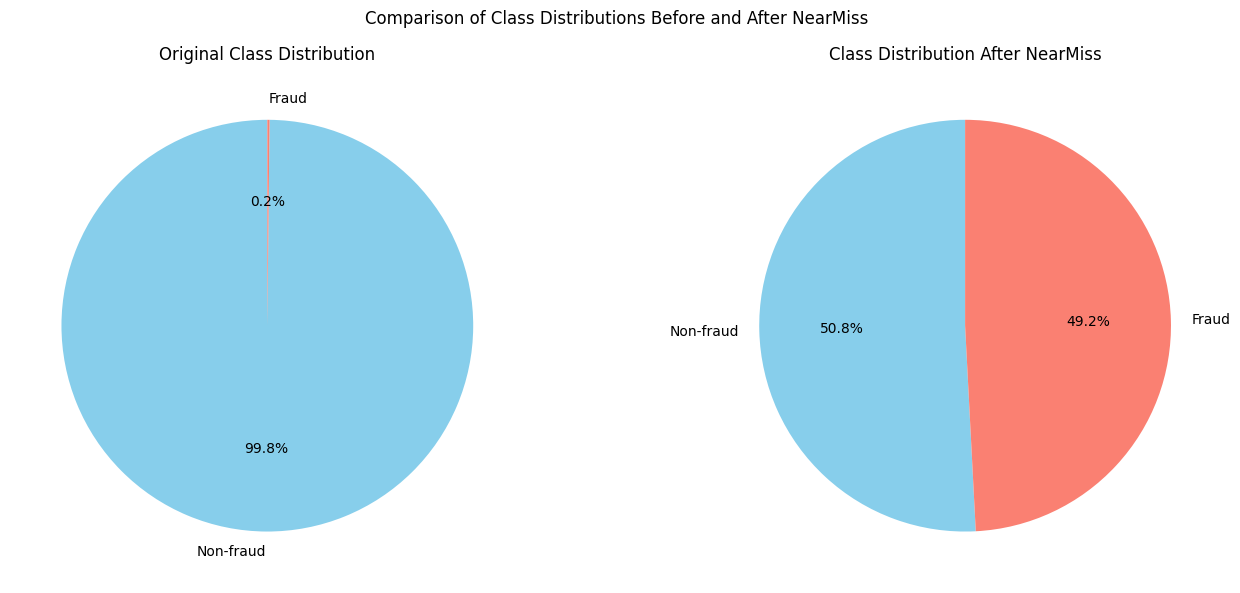

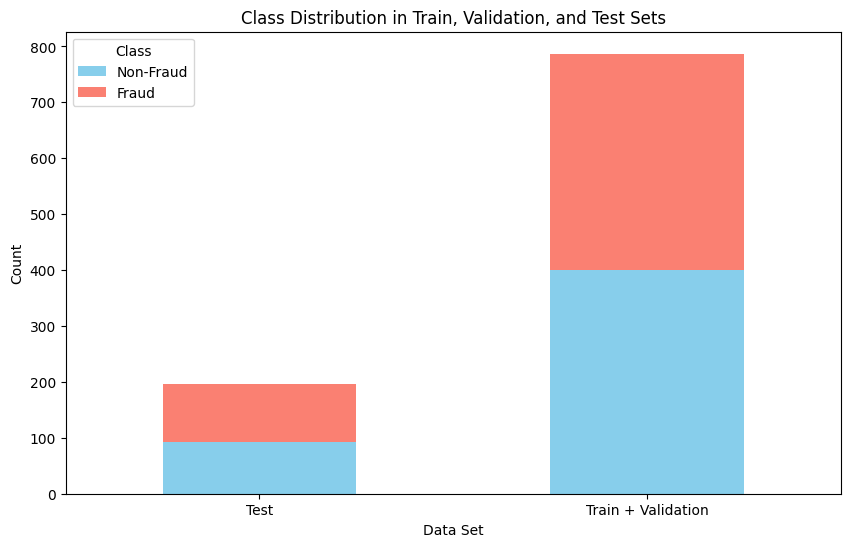

In [ ]:
class_counts_original = y.value_counts()


class_counts_balanced = pd.Series(y_train_emir).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].pie(class_counts_original, labels=['Non-fraud', 'Fraud'],
            autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[0].set_title('Original Class Distribution')


axes[1].pie(class_counts_balanced, labels=['Non-fraud', 'Fraud'],
            autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[1].set_title('Class Distribution After NearMiss')


plt.suptitle('Comparison of Class Distributions Before and After NearMiss')
plt.tight_layout()
plt.show()

train_df = pd.DataFrame({'Set': 'Train + Validation', 'Class': y_train_emir})
test_df = pd.DataFrame({'Set': 'Test', 'Class': y_test_emir})

all_data = pd.concat([train_df, test_df])

plt.figure(figsize=(10, 6))
all_data.groupby(['Set', 'Class']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'salmon'])

plt.title("Class Distribution in Train, Validation, and Test Sets")
plt.xlabel("Data Set")
plt.ylabel("Count")
plt.legend(["Non-Fraud", "Fraud"], title="Class")
plt.xticks(rotation=0)
plt.show()

Traitement des outliers de fedi

In [ ]:
m_fedi = X_train_fedi.median()

def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(X_train_fedi)

for col in X_train_fedi.columns:
    X_train_fedi[col] = list(map(lambda x,y : x if pd.isna(y) else m_fedi[col] ,X_train_fedi[col],outliers[col]))
outliers = find_outliers_IQR(X_test_fedi)
for col in X_train_fedi.columns:
    X_test_fedi[col] = list(map(lambda x,y : x if pd.isna(y) else m_fedi[col] ,X_test_fedi[col],outliers[col]))

Traitement des outliers de iheb

In [ ]:
m_iheb = X_train_iheb.median()

def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(X_train_iheb)

for col in X_train_iheb.columns:
    X_train_iheb[col] = list(map(lambda x,y : x if pd.isna(y) else m_iheb[col] ,X_train_iheb[col],outliers[col]))
outliers = find_outliers_IQR(X_test_iheb)
for col in X_train_iheb.columns:
    X_test_iheb[col] = list(map(lambda x,y : x if pd.isna(y) else m_iheb[col] ,X_test_iheb[col],outliers[col]))

# **Traitement des outliers de emir **

In [ ]:
m_emir = X_train_emir.median()

def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(X_train_emir)

for col in X_train_emir.columns:
    X_train_emir[col] = list(map(lambda x,y : x if pd.isna(y) else m_emir[col] ,X_train_emir[col],outliers[col]))
outliers = find_outliers_IQR(X_test_emir)
for col in X_train_emir.columns:
    X_test_emir[col] = list(map(lambda x,y : x if pd.isna(y) else m_emir[col] ,X_test_emir[col],outliers[col]))

## **application du algorithme de classification "logistic regression" pour choisir la meilleure dataset entre fedi emir et iheb**

In [ ]:
model_LR = LogisticRegression(random_state=30)

model = make_pipeline(StandardScaler(), model_LR)

# Set up cross-validation strategy (StratifiedKFold is good for imbalanced data)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with ROC-AUC scoring
f1_score = cross_val_score(model, X_train_fedi, y_train_fedi, cv=cv, scoring='f1_macro')

print("f1 score de fedi = ",np.mean(f1_score))

f1 score de fedi =  0.9758885585078794


In [ ]:

f1_score = cross_val_score(model, X_train_iheb, y_train_iheb,cv=cv,scoring='f1_macro')

print("f1 score de iheb = ",np.mean(f1_score))

f1 score de iheb =  0.9791301657380075


In [ ]:

f1_score = cross_val_score(model, X_train_emir, y_train_emir,cv=cv,scoring='f1_macro')

print("f1 score de emir = ",np.mean(f1_score))


f1 score de emir =  0.9401998325162152


on a choisit dataset iheb selon la precision recall f1-score accuracy et ROC AUC Score
on applique 5 algorithmes de classification

In [ ]:
LR = LogisticRegression(random_state=30)
model_LR = make_pipeline(StandardScaler(), LR)
DT = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model_DT = make_pipeline(StandardScaler(), DT)
model_KNN = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=50))
model_NB = make_pipeline(StandardScaler(),GaussianNB())
model_SVC = make_pipeline(StandardScaler(), LinearSVC(random_state=42, max_iter=1000))


LogisticRegression

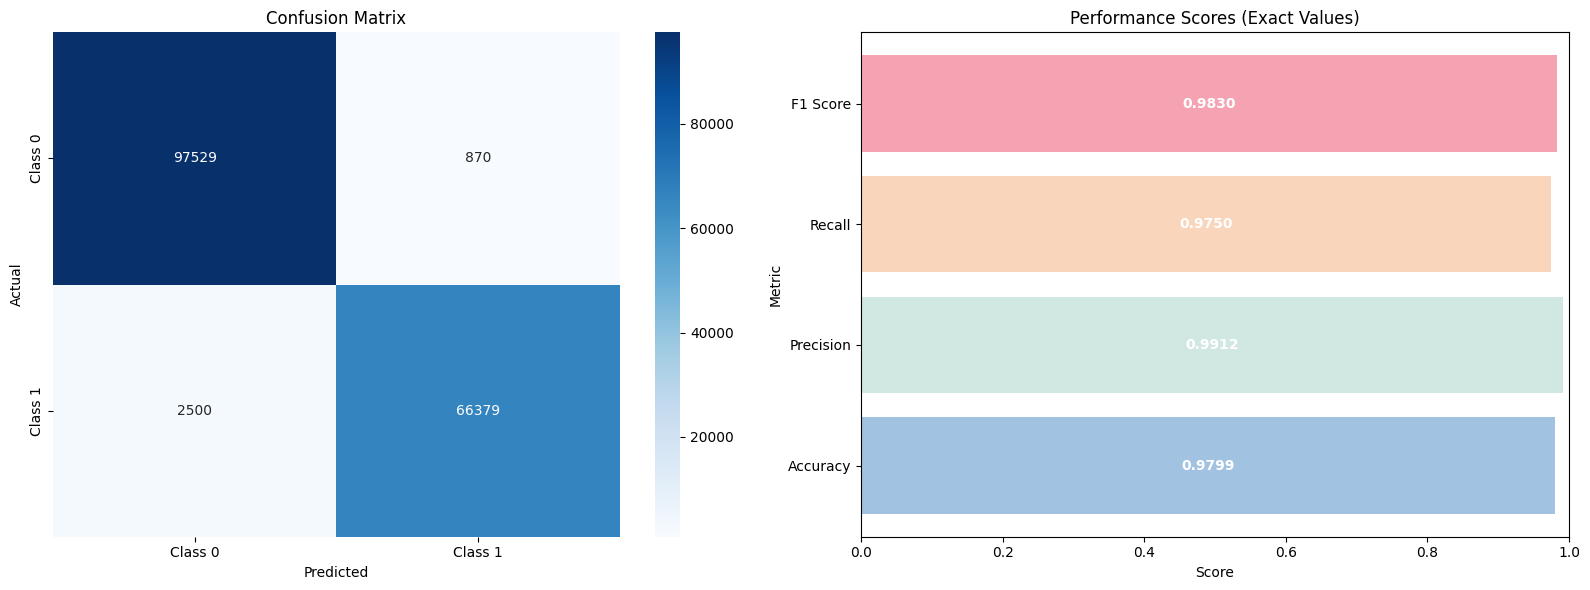

In [ ]:

y_pred = cross_val_predict(model_LR, X_train_iheb, y_train_iheb, cv=cv)
cm = confusion_matrix(y_train_iheb, y_pred)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Scores to be plotted
scores = [accuracy, precision, recall, f1_score]
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Softer pastel colors
colors = ['#A2C2E2', '#D1E8E2', '#F9D5BB', '#F5A3B3']

# Create the figure with two subplots (Confusion Matrix + Horizontal Bar Chart)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plotting the performance scores as a horizontal bar chart
bars = axes[1].barh(score_labels, scores, color=colors)

# Add the exact values *inside* the bars
for bar, score in zip(bars, scores):
    width = bar.get_width()  # Bar length corresponds to the score value
    text_position = width / 2  # Center the text within the bar
    axes[1].text(text_position, bar.get_y() + bar.get_height() / 2, f'{score:.4f}',
                 ha='center', va='center', color='white', fontsize=10, weight='bold')

# Setting up the horizontal bar chart
axes[1].set_xlim(0, 1)  # Since scores are between 0 and 1
axes[1].set_title('Performance Scores (Exact Values)')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Metric')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Decision tree

In [ ]:

y_pred = cross_val_predict(model_DT, X_train_iheb, y_train_iheb, cv=cv)
cm = confusion_matrix(y_train_iheb, y_pred)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Scores to be plotted
scores = [accuracy, precision, recall, f1_score]
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Softer pastel colors
colors = ['#A2C2E2', '#D1E8E2', '#F9D5BB', '#F5A3B3']

# Create the figure with two subplots (Confusion Matrix + Horizontal Bar Chart)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plotting the performance scores as a horizontal bar chart
bars = axes[1].barh(score_labels, scores, color=colors)

# Add the exact values *inside* the bars
for bar, score in zip(bars, scores):
    width = bar.get_width()  # Bar length corresponds to the score value
    text_position = width / 2  # Center the text within the bar
    axes[1].text(text_position, bar.get_y() + bar.get_height() / 2, f'{score:.4f}',
                 ha='center', va='center', color='white', fontsize=10, weight='bold')

# Setting up the horizontal bar chart
axes[1].set_xlim(0, 1)  # Since scores are between 0 and 1
axes[1].set_title('Performance Scores (Exact Values)')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Metric')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Knn

In [ ]:

y_pred = cross_val_predict(model_KNN, X_train_iheb, y_train_iheb, cv=cv)
cm = confusion_matrix(y_train_iheb, y_pred)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Scores to be plotted
scores = [accuracy, precision, recall, f1_score]
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Softer pastel colors
colors = ['#A2C2E2', '#D1E8E2', '#F9D5BB', '#F5A3B3']

# Create the figure with two subplots (Confusion Matrix + Horizontal Bar Chart)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plotting the performance scores as a horizontal bar chart
bars = axes[1].barh(score_labels, scores, color=colors)

# Add the exact values *inside* the bars
for bar, score in zip(bars, scores):
    width = bar.get_width()  # Bar length corresponds to the score value
    text_position = width / 2  # Center the text within the bar
    axes[1].text(text_position, bar.get_y() + bar.get_height() / 2, f'{score:.4f}',
                 ha='center', va='center', color='white', fontsize=10, weight='bold')

# Setting up the horizontal bar chart
axes[1].set_xlim(0, 1)  # Since scores are between 0 and 1
axes[1].set_title('Performance Scores (Exact Values)')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Metric')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

BalancedRandomForest

In [ ]:
y_pred = cross_val_predict(model_NB, X_train_iheb, y_train_iheb, cv=cv)
cm = confusion_matrix(y_train_iheb, y_pred)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Scores to be plotted
scores = [accuracy, precision, recall, f1_score]
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Softer pastel colors
colors = ['#A2C2E2', '#D1E8E2', '#F9D5BB', '#F5A3B3']

# Create the figure with two subplots (Confusion Matrix + Horizontal Bar Chart)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plotting the performance scores as a horizontal bar chart
bars = axes[1].barh(score_labels, scores, color=colors)

# Add the exact values *inside* the bars
for bar, score in zip(bars, scores):
    width = bar.get_width()  # Bar length corresponds to the score value
    text_position = width / 2  # Center the text within the bar
    axes[1].text(text_position, bar.get_y() + bar.get_height() / 2, f'{score:.4f}',
                 ha='center', va='center', color='white', fontsize=10, weight='bold')

# Setting up the horizontal bar chart
axes[1].set_xlim(0, 1)  # Since scores are between 0 and 1
axes[1].set_title('Performance Scores (Exact Values)')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Metric')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

SVC

In [ ]:

y_pred = cross_val_predict(model_SVC, X_train_iheb, y_train_iheb, cv=cv)
cm = confusion_matrix(y_train_iheb, y_pred)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Scores to be plotted
scores = [accuracy, precision, recall, f1_score]
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Softer pastel colors
colors = ['#A2C2E2', '#D1E8E2', '#F9D5BB', '#F5A3B3']

# Create the figure with two subplots (Confusion Matrix + Horizontal Bar Chart)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plotting the performance scores as a horizontal bar chart
bars = axes[1].barh(score_labels, scores, color=colors)

# Add the exact values *inside* the bars
for bar, score in zip(bars, scores):
    width = bar.get_width()  # Bar length corresponds to the score value
    text_position = width / 2  # Center the text within the bar
    axes[1].text(text_position, bar.get_y() + bar.get_height() / 2, f'{score:.4f}',
                 ha='center', va='center', color='white', fontsize=10, weight='bold')

# Setting up the horizontal bar chart
axes[1].set_xlim(0, 1)  # Since scores are between 0 and 1
axes[1].set_title('Performance Scores (Exact Values)')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Metric')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:

model.fit(X_train_iheb, y_train_iheb)

y_pred = model.predict(X_test_iheb)

cm = confusion_matrix(y_test_iheb, y_pred)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Scores to be plotted
scores = [accuracy, precision, recall, f1_score]
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Softer pastel colors
colors = ['#A2C2E2', '#D1E8E2', '#F9D5BB', '#F5A3B3']

# Create the figure with two subplots (Confusion Matrix + Horizontal Bar Chart)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plotting the performance scores as a horizontal bar chart
bars = axes[1].barh(score_labels, scores, color=colors)

# Add the exact values *inside* the bars
for bar, score in zip(bars, scores):
    width = bar.get_width()  # Bar length corresponds to the score value
    text_position = width / 2  # Center the text within the bar
    axes[1].text(text_position, bar.get_y() + bar.get_height() / 2, f'{score:.4f}',
                 ha='center', va='center', color='white', fontsize=10, weight='bold')

# Setting up the horizontal bar chart
axes[1].set_xlim(0, 1)  # Since scores are between 0 and 1
axes[1].set_title('Performance Scores (Exact Values)')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Metric')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
model_DT.fit(X_train_iheb, y_train_iheb)

y_pred = model_DT.predict(X_test_iheb)

cm = confusion_matrix(y_test_iheb, y_pred)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Scores to be plotted
scores = [accuracy, precision, recall, f1_score]
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Softer pastel colors
colors = ['#A2C2E2', '#D1E8E2', '#F9D5BB', '#F5A3B3']

# Create the figure with two subplots (Confusion Matrix + Horizontal Bar Chart)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plotting the performance scores as a horizontal bar chart
bars = axes[1].barh(score_labels, scores, color=colors)

# Add the exact values inside the bars
for bar, score in zip(bars, scores):
    width = bar.get_width()  # Bar length corresponds to the score value
    text_position = width / 2  # Center the text within the bar
    axes[1].text(text_position, bar.get_y() + bar.get_height() / 2, f'{score:.4f}',
                 ha='center', va='center', color='white', fontsize=10, weight='bold')

# Setting up the horizontal bar chart
axes[1].set_xlim(0, 1)  # Since scores are between 0 and 1
axes[1].set_title('Performance Scores (Exact Values)')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Metric')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()